In [1]:
from itertools import islice
from os import listdir, makedirs
from pathlib import Path

import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
def load_data(dir_path):
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(listdir(dir_path))):
        if not path.startswith("."):
            labels[i] = path
            for file in listdir(dir_path + path):
                if not file.startswith("."):
                    img = cv2.imread(dir_path + path + "/" + file)
                    X.append(img)
                    y.append(i)
            i += 1
    y = np.array(y)
    print(f"{len(X)} images loaded from {dir_path} directory.")
    return X, y, labels

In [3]:
def crop_imgs(padding=0):
    """
    Finds the extreme points on the image and crops the rectangular out of them
    """

    def inner(img):
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # threshold the image, then perform a series of erosions +
        # dilations to remove any small regions of noise
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # find contours in thresholded image, then grab the largest one
        cnts = cv2.findContours(
            thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
        )
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # find the extreme points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        return img[
            extTop[1] - padding : extBot[1] + padding,
            extLeft[0] - padding : extRight[0] + padding,
        ]

    return inner

In [4]:
def resize_imgs(target_size):
    def inner(img):
        return cv2.resize(img, dsize=target_size, interpolation=cv2.INTER_CUBIC)

    return inner

In [5]:
def plot_samples(X, y, labels_dict, n=50):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    for label_index, label in labels_dict.items():
        imgs = islice(
            map(
                lambda ix: ix[1],  # take the img
                filter(
                    lambda ix: y[ix[0]] == label_index,  # if y[index] == label_index
                    enumerate(X),  # make into (index, img)
                ),
            ),
            n,
        )  # take first n

        plt_width = 10
        plt_height = int(n // plt_width)

        plt.figure(figsize=(15, 6))

        for c, img in enumerate(imgs):
            plt.subplot(plt_height, plt_width, c + 1)
            plt.imshow(img)
            #             # remove axis numbers
            plt.xticks([])
            plt.yticks([])

        plt.suptitle(f"Tumor: {label}")

        plt.show()

In [6]:
def save_new_images(x_set, y_set, labels, folder_name):
    for i, (img, imclass) in enumerate(zip(x_set, y_set)):
        subdir = labels[imclass]
        filename = f"{i}.jpg"
        img_folder = Path(folder_name) / subdir
        makedirs(img_folder, exist_ok=True)
        img_path = img_folder / filename
        cv2.imwrite(str(img_path), img)

## Load Data

Set the data directory.
For this project, we will be ignoring the provided 'pred' data because it does not contain known labels.
Load data and split into training/validation/testing sets with a 80/10/10 split.

In [7]:
raw_dir = "./data/raw/"
train_raw_dir = raw_dir + "train/"

In [8]:
# unzip data.zip
if not Path(train_raw_dir).is_dir():
    !unzip -o data/data.zip -d {raw_dir}

In [15]:
x, y, labels = load_data(train_raw_dir)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.45s/it]

3000 images loaded from ./data/raw/train/ directory.


## Visualize the data split

## Visualize the images

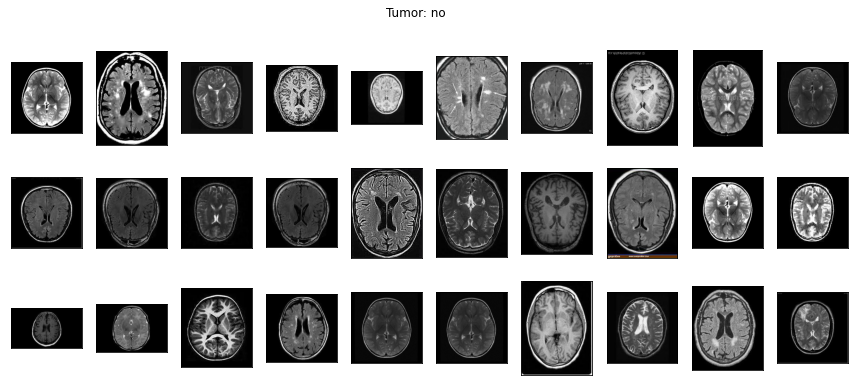

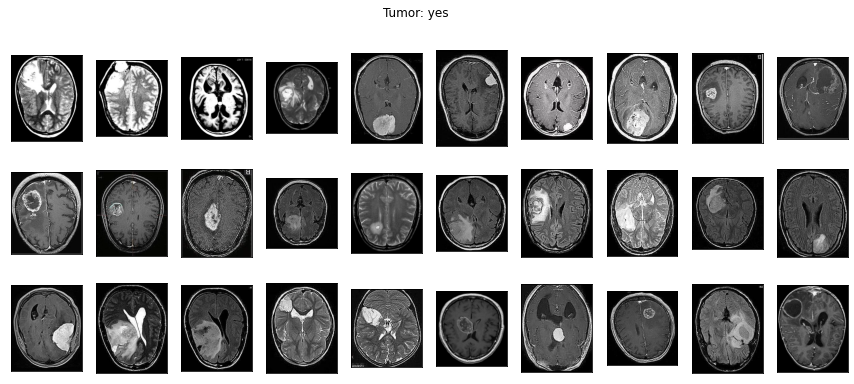

In [17]:
plot_samples(x, y, labels, 30)

## Crop Images

In [18]:
target_img_size = (224, 224)

x_crop = list(map(resize_imgs(target_img_size), map(crop_imgs(), x)))

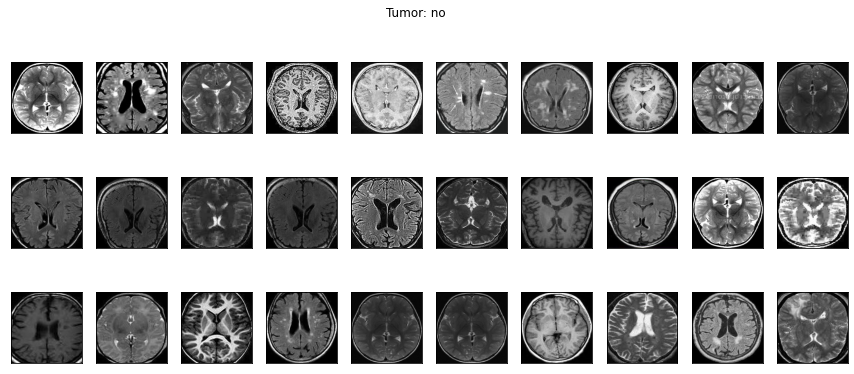

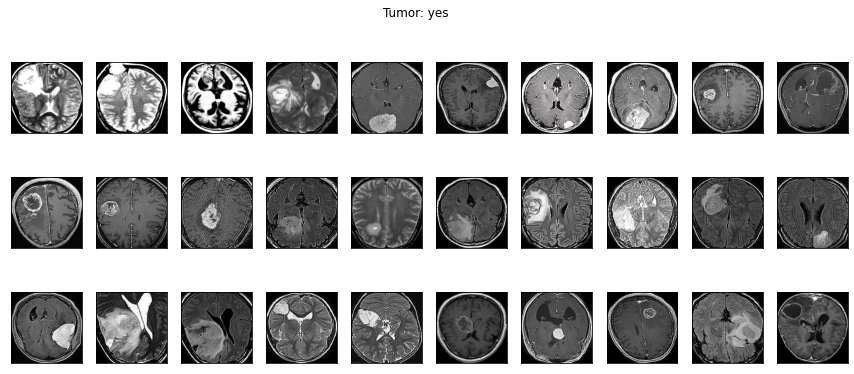

In [19]:
plot_samples(x_crop, y, labels, 30)

## Save Images

In [20]:
labels = {1: "yes", 0: "no"}

save_new_images(x_crop, y, labels, folder_name="data/crop/")

In [11]:
x = cv2.imread()

In [21]:
def inner(img):
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # threshold the image, then perform a series of erosions +
        # dilations to remove any small regions of noise
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # find contours in thresholded image, then grab the largest one
        cnts = cv2.findContours(
            thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
        )
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # find the extreme points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        return img[
            extTop[1] - padding : extBot[1] + padding,
            extLeft[0] - padding : extRight[0] + padding,
        ]

In [24]:
from PIL import Image
img = Image.open("./data/raw/train/no/no115.jpg")
padding = 0

e = inner(x)

In [ ]:
tar
resize_imgs(target_img_size)